<a href="https://colab.research.google.com/github/navagg/ML_notebooks/blob/master/Keras_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.datasets import load_digits

digits = load_digits()

Using TensorFlow backend.


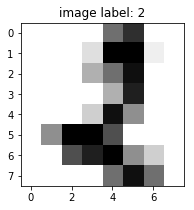

In [0]:
sample_index = 75
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

# Preprocessing
1. normalization
2. train/test split

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

#print(X_train[:3])
# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#print(scaler.mean_)
#print(scaler.scale_)

#### Let's display the one of the transformed sample (after feature standardization):



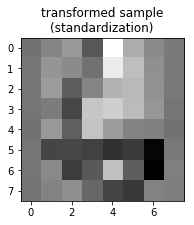

In [0]:
sample_index = 75
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

##### The scaler objects makes it possible to recover the original sample

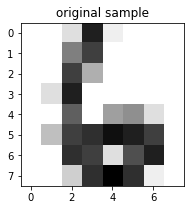

In [0]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [0]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


#### Feed Forward NN with Keras
###### Objectives of this section
1. Experiment with different optimizers, activations, size of layers, initializations
2. Keras Workflow
3. To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [0]:
y_train[:3]

array([2, 9, 5], dtype=int32)

#####  Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [0]:

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.Adam(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 0s 161us/step - loss: 0.7448 - acc: 0.8317
Epoch 2/15
1527/1527 [==============================] - 0s 41us/step - loss: 0.2979 - acc: 0.9365
Epoch 3/15
1527/1527 [==============================] - 0s 42us/step - loss: 0.2827 - acc: 0.9443
Epoch 4/15
1527/1527 [==============================] - 0s 41us/step - loss: 0.3260 - acc: 0.9443
Epoch 5/15
1527/1527 [==============================] - 0s 40us/step - loss: 0.3923 - acc: 0.9365
Epoch 6/15
1527/1527 [==============================] - 0s 41us/step - loss: 0.2885 - acc: 0.9528
Epoch 7/15
1527/1527 [==============================] - 0s 42us/step - loss: 0.2998 - acc: 0.9587
Epoch 8/15
1527/1527 [==============================] - 0s 40us/step - loss: 0.2436 - acc: 0.9627
Epoch 9/15
1527/1527 [==============================] - 0s 45us/step - loss: 0.1990 - acc: 0.9666
Epoch 10/15
1527/1527 [==============================] - 0s 42us/step - loss: 0.2821 - acc: 0.9574
Epoch 11/15
1527/1